## Question 1

Here we simply select random values which are uniformly distributed in [0,1) interval.

For $\theta$, we just scale random values with a magnitude of $2\pi$.

For $r$, we need to use *inverse method* to sample from given density function ( $pdf$ ).

To find the cumulative density function ( $cdf$ ), we take the integration of given $pdf$ ( $2r$ ), and find the value as $r^2$.

Then we take the inverse of $cdf$, and find the inverse function as $\sqrt u$.

To sample uniformly from given $pdf$, we sample from uniform distribution, find the result of $\sqrt u$ function for that random value, and scale the result by a magnitude of $r$.

You can find the procedure and corresponding plot which show a set of points uniformly sampled from inside the unit circle.

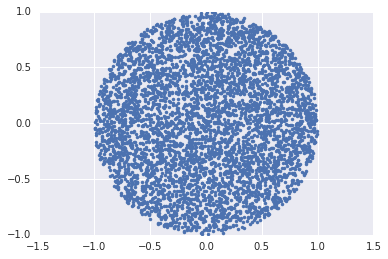

In [212]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage as ndi

def sample_from_circle(N, radius):
    # For theta, sample from uniform distribution, scale with 2*pi
    theta = np.random.rand(N) * 2 * np.pi

    # For r, we have pdf as 2*r, therefore we have cdf as r**2
    # When we take inverse of it, we get sqrt(r)
    # Therefore, we sample from uniform distribution, then take square root
    r = radius * np.sqrt(np.random.rand(N))

    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y))


N = 5000
points = sample_from_circle(N, 1)

# Plot the set of sample points 
plt.axis('equal')
plt.plot(points[:,0],points[:,1], ".")



## Question 2

To perform rejection sampling, for each random point that is uniformly selected from the unit circle, we should check if that point falls inside the corresponding p-norm ball. We can check this condition by assuring that given region condition holds. Here is the method which filters given set of points such that points which do not fall inside the corresponding p-norm ball will be discarded.

In [199]:
N = 5000
points = sample_from_circle(N, 1)

def select_samples_in_p_norm_ball(points, p):
    accept_status = (np.abs(points[:,0]) ** p + np.abs(points[:,1]) ** p) ** (1/p) <= 1
    return points[accept_status,:]


### Norm Ball for p = 1.5

Here is the plot of the set of sample points uniformly distributed from inside the p-norm ball for p = 1,5. You can see the acceptance rate in the log.

Acceptance Rate for p = 1.50 => 0.87


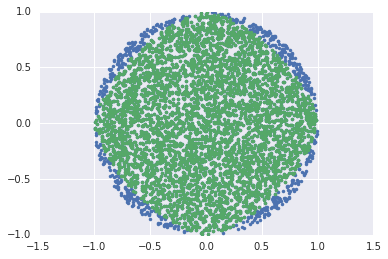

In [213]:
p1 = 1.5
p1_sample = select_samples_in_p_norm_ball(points, p1)
print "Acceptance Rate for p = %.2f => %.2f" % (p1, len(p1_sample)/float(N))

plt.axis('equal')
plt.plot(points[:,0],points[:,1], ".")
plt.plot(p1_sample[:,0],p1_sample[:,1], ".")


### Norm Ball for p = 0.7

Here is the plot of the set of sample points uniformly distributed from inside the p-norm ball for $p = 0,7$. You can see the acceptance rate for this scenario is fairly low, which shows that sampling from unit circle is not a good idea for $p = 0,7$.

Acceptance Rate for p = 0.70 : 0.41


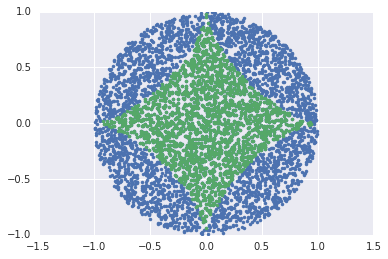

In [214]:
p2 = 0.7

p2_sample = select_samples_in_p_norm_ball(points, p2)
print "Acceptance Rate for p = %.2f : %.2f" % (p2, len(p2_sample)/float(N))

plt.axis('equal')
plt.plot(points[:,0],points[:,1], ".")
plt.plot(p2_sample[:,0],p2_sample[:,1], ".")

#### Better Sampling for p = 0.7

In order to improve the acceptance rates of our samples, we can sample from a 45-degree rotated square whose center is at point (0,0) and whose side length is $\sqrt2$

Here is the plot for sample space of proposal, and corresponding norm-balls. We can see that the acceptance rate has been increased from $0,41$ to $0,64$.

Acceptance Rate for p = 0.70 : 0.64


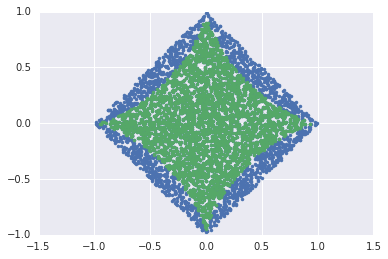

In [215]:
def sample_from_rotated_square(N, side_length):
    points = np.random.rand(N, 2) * side_length - side_length / 2
    return np.dot(points,[[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4)]])

points_better = sample_from_rotated_square(N, np.sqrt(2))

p2_sample_better = select_samples_in_p_norm_ball(points_better, p2)
print "Acceptance Rate for p = %.2f : %.2f" % (p2, len(p2_sample_better)/float(N))

plt.axis('equal')
plt.plot(points_better[:,0],points_better[:,1], ".")
plt.plot(p2_sample_better[:,0],p2_sample_better[:,1], ".")